# **Lectura de Datos**

In [150]:
import os, geopandas as gpd
countries=gpd.read_file('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/maps/World_Countries/World_Countries.shp')
cities=gpd.read_file('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/maps/World_Cities/World_Cities.shp')
rivers=gpd.read_file('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/maps/World_Hydrography/World_Hydrography.shp')

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PREGUNTA 1

**1. Verificar si esta proyectado**

In [152]:
australia=countries[countries.COUNTRY=='Australia']

In [153]:
australia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [154]:
australia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [155]:
australia.crs.is_projected

False

*Se debe reproyectar*

In [156]:
australia.centroid

<ipython-input-156-a2fa2a7b088b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  australia.centroid


,0
11,POINT (134.48956 -25.73497)


**2. Realizar reproyeccion con el [crs](https://epsg.io/3112) encontrado**

In [157]:
australia.to_crs(3112).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [158]:
australia.to_crs(3112).centroid

,0
11,POINT (32199.226 -2924192.688)


<Axes: >

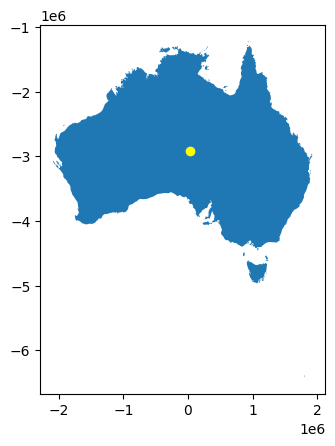

In [159]:
#reproyeccion del borde y la base
base3112=australia.to_crs(3112).plot()
australia.to_crs(3112).centroid.plot(color='yellow',ax=base3112)

In [160]:
#se reproyecta tambien las ciudades y rios de australia
#base
australia_3112=australia.to_crs(3112)
#ciudades
cities_australia_3112=cities[cities.COUNTRY=='Australia'].to_crs(3112)
#rios
riversAustralia_clipped=gpd.clip(rivers,australia)
rivers_australia_3112=riversAustralia_clipped.to_crs(australia_3112.crs)


**3. Se muestra el mapa con las capas reproyectadas**


<Axes: >

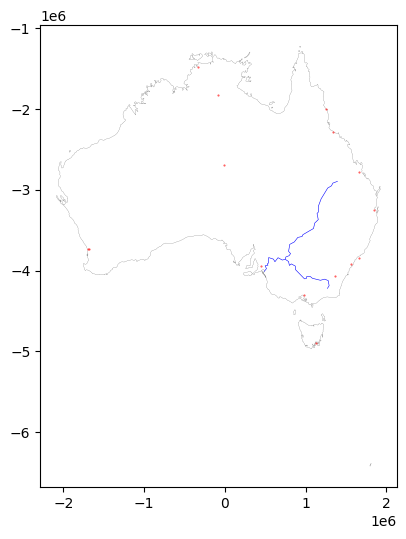

In [161]:
base = australia_3112.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(6,6))

rivers_australia_3112.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# encima de
cities_australia_3112.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # encima de

**4. Se guada las capas del mapa en la carpeta maps**

In [173]:
import os

australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='country', driver="GPKG")
cities_australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='cities', driver="GPKG")
rivers_australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='rivers', driver="GPKG")
#brazil_5641.centroid.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='centroid', driver="GPKG")

## PREGUNTA 2


**1. Se busca datos de los aeropuertos en Australia**

In [174]:
import pandas as pd
#informacion de aeropuertos del mundo
infoairports=pd.read_csv('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/data/airports.csv')
#se filtra la informacion
airports_aus=infoairports[infoairports.iso_country=='AU']
airports_aus.reset_index(drop=True, inplace=True)
airports_aus.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,314491,AGY,small_airport,Argyle Downs Airport,-16.508604,128.922485,407.0,OC,AU,AU-WA,Argyle Downs,no,NaN,AGY,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Argyle_Downs_Air...,AGY
1,312361,ANZ,small_airport,Angus Downs Airport,-25.032500,132.274800,1724.0,OC,AU,AU-NT,Angus Downs Station,no,NaN,ANZ,YADN,NaN,NaN,NaN,NaN
2,28102,AU-0001,closed,Hopetoun Airfield,-33.908501,120.147003,NaN,OC,AU,AU-WA,Hopetoun,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38201,AU-0002,small_airport,Dwellingup Airstrip,-32.692699,116.074997,NaN,OC,AU,AU-WA,Dwellingup,no,NaN,NaN,NaN,A01,NaN,NaN,http://sabc.org.au/knav/airport/A01.html
4,38202,AU-0003,small_airport,Tjukayirla Roadhouse Airstrip,-27.155199,124.584999,1425.0,OC,AU,AU-WA,Cosmo Newbery,no,NaN,NaN,NaN,A02,NaN,NaN,NaN


In [175]:
#se busca los datos de las columnas
airports_aus.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [176]:
#se verifica que los datos que nos interesan sean numericos
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','municipality']
airports_aus=airports_aus.loc[:,keep]
airports_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2754 non-null   object 
 1   type           2754 non-null   object 
 2   latitude_deg   2754 non-null   float64
 3   longitude_deg  2754 non-null   float64
 4   elevation_ft   1577 non-null   float64
 5   municipality   1578 non-null   object 
dtypes: float64(3), object(3)
memory usage: 129.2+ KB


**2. Se verifica que los datos de los aeropuertos no estan proyectados**

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

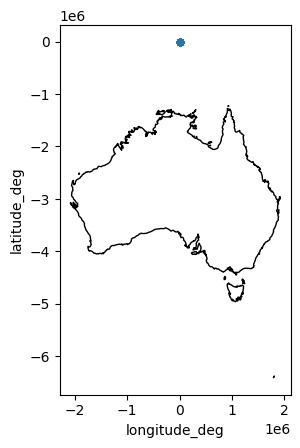

In [177]:
base =australia_3112.plot(color='white',edgecolor='black')
airports_aus.plot.scatter(x='longitude_deg',y='latitude_deg',ax=base)

<Axes: >

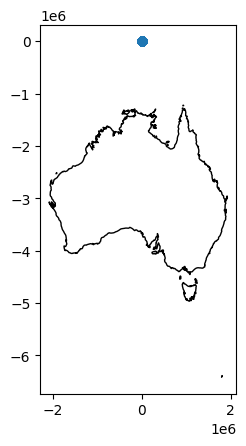

In [178]:
#Primero se convierte el archivo a data espacial
airports=gpd.GeoDataFrame(data=airports_aus.copy(),
                 geometry=gpd.points_from_xy(airports_aus.longitude_deg,
                                             airports_aus.latitude_deg),
                 crs=australia.crs.to_epsg())

base = australia_3112.plot(color='white', edgecolor='black')
airports.plot(ax=base)

*pero todavia no esta proyectado*

In [179]:
#se verifica que la primera data es solo un data frame pero la segunda es un archivo espacial
type(airports),type(airports_aus)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

**3. Se crea una capa de los aeropuertos proyectados**

<Axes: >

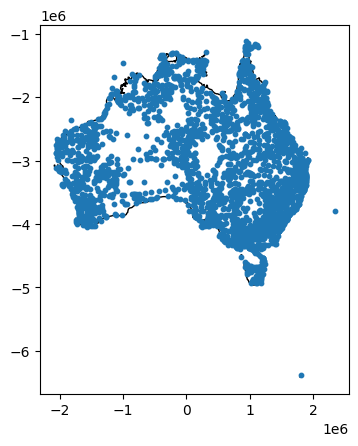

In [180]:
#Se proyecta la data espacial al mismo crs de la base
airports_3112=airports.to_crs(3112)

base=australia_3112.plot(color='white',edgecolor='black')
airports_3112.plot(ax=base, markersize=10)

**4. Se muestra el mapa con todas las capas anteriores y la capa de aeropuertos arriba**

<Axes: >

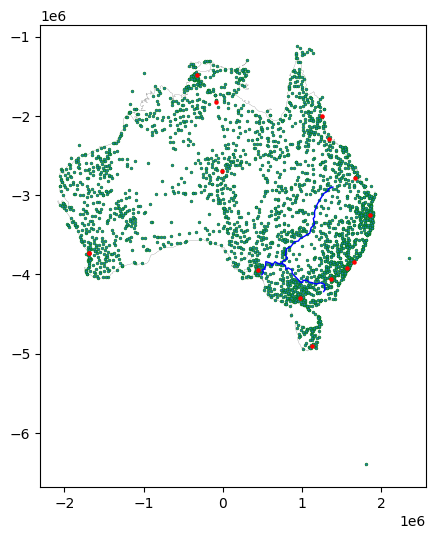

In [181]:
base = australia_3112.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(6,6))
airports_3112.plot(edgecolor='green', linewidth=0.4,
            ax=base, markersize=4)
rivers_australia_3112.plot(edgecolor='blue', linewidth=1,
            ax=base)# encima de
cities_australia_3112.plot(marker='.', color='red', markersize=20,
            ax=base,) # encima de

In [182]:
#Verificacion que existen diferentes tipos de aeropuertos
airports_3112['type'].value_counts()

,count
type,
small_airport,2073
heliport,392
medium_airport,185
closed,94
large_airport,6
seaplane_base,4


**5. Se guarda la capa de aeropuertos en el mapa**

In [183]:
airports_3112.rename(columns={'type':'kind'},inplace=True)
airports_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='airports', driver="GPKG")

## PREGUNTA 3

**1. Verificar si Australia es poligono o multipoligono**

In [184]:
australia_3112

,COUNTRY,geometry
11,Australia,"MULTIPOLYGON (((933348.661 -1235788.329, 92574..."


**2.Se recupera los limites de Australia**

In [185]:
australia_3112.boundary

,0
11,"MULTILINESTRING ((933348.661 -1235788.329, 925..."


<Axes: >

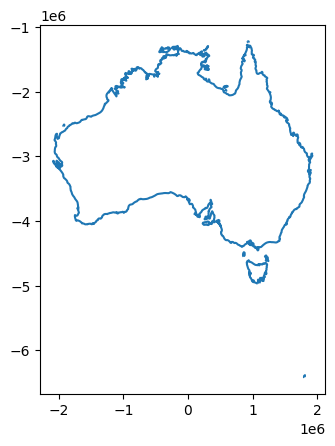

In [186]:
australia_3112.boundary.plot()

In [187]:
type(australia_3112.boundary) #Se verfica que el dato es una geoserie no geo data frame

geopandas.geoseries.GeoSeries

**3. Se convierte la geoserie a geodataframe**

In [188]:
# conversion
australia_border=australia_3112.boundary.to_frame()

# Se añade una columna para pooner el nombre del pais
australia_border['name']='Australia'

# Se renombra el nombre de la columna geometry
australia_border.rename(columns={0:'geometry'},inplace=True)

# Se asigna el borde
australia_border = australia_border.set_geometry("geometry")

# Verificacion
australia_border.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [189]:
australia_border

,geometry,name
11,"MULTILINESTRING ((933348.661 -1235788.329, 925...",Australia


**4. Se guarda la capa en el mapa**

In [190]:
australia_border.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='border', driver="GPKG")

## PREGUNTA 4

En esta parte se verifica si los datos de estados y subregiones de Australia esta proyectados

In [191]:
import os, geopandas as gpd
australia_states=gpd.read_file('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/states%20and%20territories%20aus/STE_2021_AUST_GDA2020.shp')
australia_local_government_areas=gpd.read_file('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/local%20goverment%20areas%20aus/LGA_2024_AUST_GDA2020.shp')

In [192]:
#Se verifica que son geodataframes
type(australia_states), type(australia_local_government_areas)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [193]:
australia_states.geometry.head()

,geometry
0,"MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ..."
1,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,"MULTIPOLYGON (((142.5314 -10.68301, 142.53072 ..."
3,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."


In [194]:
australia_local_government_areas.geometry.head()

,geometry
0,"POLYGON ((146.86566 -36.07292, 146.86512 -36.0..."
1,"POLYGON ((152.38816 -30.52639, 152.38812 -30.5..."
2,"MULTIPOLYGON (((153.57106 -28.87381, 153.57106..."
3,"POLYGON ((143.00433 -33.78164, 143.01538 -33.7..."
4,"POLYGON ((149.84877 -33.52784, 149.84864 -33.5..."


**1. Se verifica que ambas estan proyectadas y tienen CRS**

In [195]:
australia_states.crs, australia_local_government_areas.crs

(<Geographic 2D CRS: EPSG:7844>
 Name: GDA2020
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
 - bounds: (93.41, -60.55, 173.34, -8.47)
 Datum: Geocentric Datum of Australia 2020
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:7844>
 Name: GDA2020
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
 - bounds: (93.41, -60.55, 173.34, -8.47)
 Datum: Geocentric Datum of Australia 2020
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

## PREGUNTA 5

De la data analizada solo se trabajara con las variables de CO2 y ForestRev_gdp

**1. Se añade la data**

In [196]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


In [197]:
# Se convierte a mayusculas los paises en la data de countries
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [198]:
# Para encontrar los paises unicos por data:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

**2. Para unir el mapa de paises y el data frame, primero se busca conincidencias entre los paises unicos por variable (FUZZY MERGING)**

In [200]:
#!pip install thefuzz

In [201]:
from thefuzz import process
#se extrae los posibles paises en comun entre los paises unicos del mapa y los paises unicos del dataframe
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('N

In [202]:
# Se mantiene solo los de puntaje alto
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZ

In [203]:
# Se guarda en un diccionario solo los de puntaje alto
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'U

In [204]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)
# Se actualiza la data con los paises recuperados
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# Se busca nuevas coincidencias
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [205]:
# De forma manual se busca en el mapa los paises de las nuevas conincidencias
countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [206]:
#Se junta solo los paises que estan presentes en la busqueda manual
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}
countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)
# # Se busca nuevas conincidencias
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [207]:
# Se guarda en un diccionario los paises con conincidencia
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [208]:
# Se actualiza la data con los paises encontrados
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# Se actualiza la busqueda
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# Se busca nuevas coincidencias por tercera ves
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [209]:
# Se junta la geodata con el data frame
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')
# Se elimina la columna duplicada de Country
theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


**3. Se reescala la data, para ello se compara diferentes metodos**

In [210]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [213]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
505,ForestRev_gdp,4.45
506,ForestRev_gdp,1.61
507,ForestRev_gdp,2.65
508,ForestRev_gdp,0.39


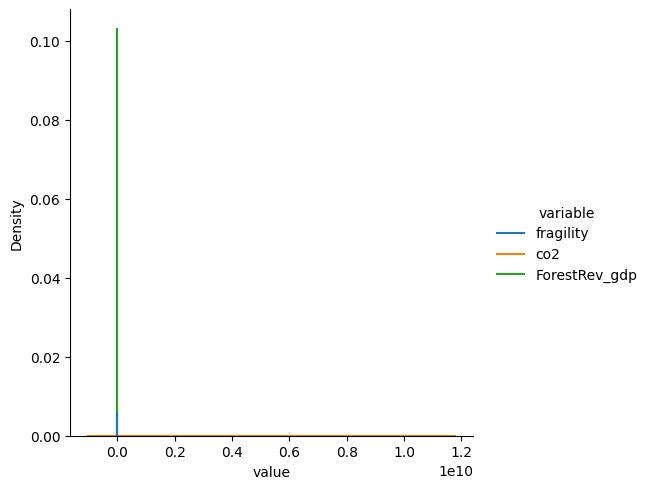

In [214]:
# Verificacion que las variables estan en diferentes unidades
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [216]:
 #!pip install -U scikit-learn

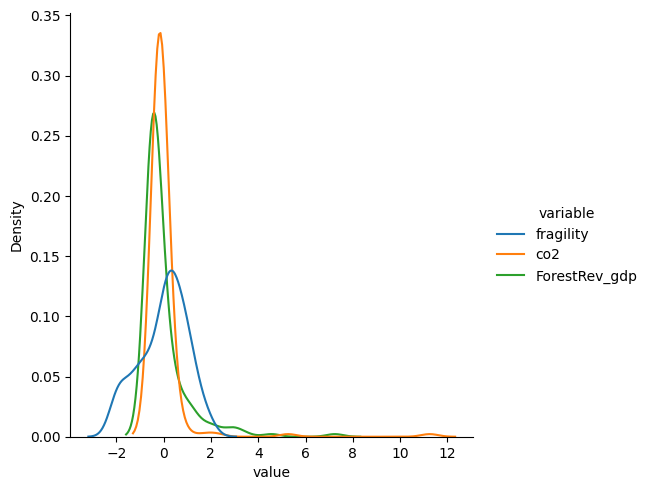

In [217]:
# 1° METODO StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

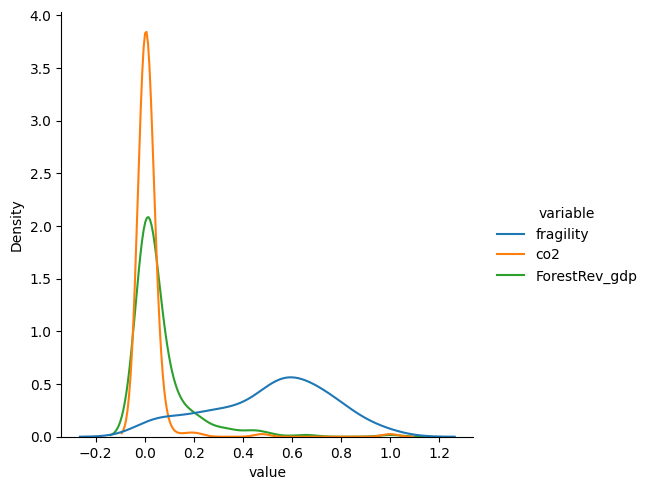

In [218]:
# 2° Metodo MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

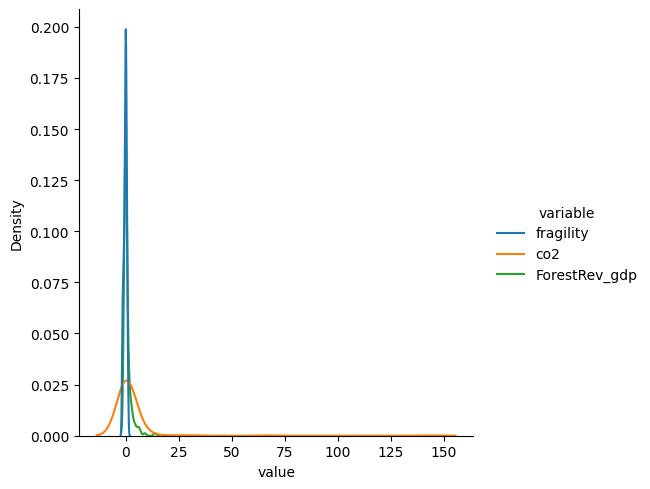

In [219]:
# 3° Metodo RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

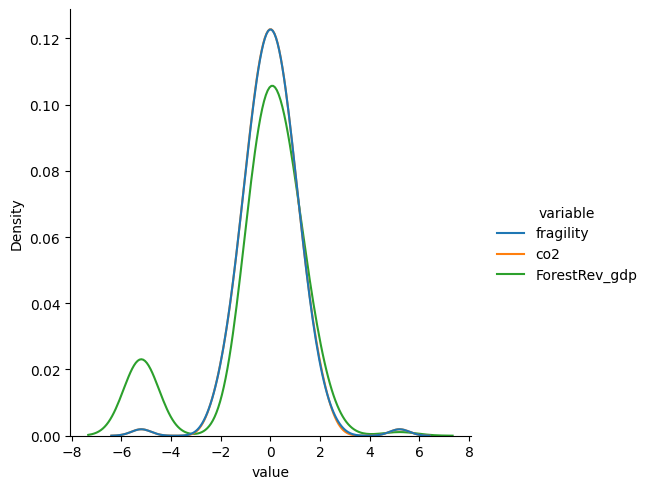

In [220]:
# 4° Metodo QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

*Se elige el ultimo metodo*

In [221]:
theMapAndData['CO2_Qt']=QtScaled_data[:,1]
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,2]

**4. Con los datos reescalados se discretiza cada variable**

In [223]:
#! pip show numba mapclassify numpy

In [225]:
#!pip install mapclassify

**CO2**

In [226]:
import mapclassify
import numpy as np

np.random.seed(12345)

# Se utiliza 5 intervalos y se compara los diferentes metodos
K=5
theVar=theMapAndData.CO2_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

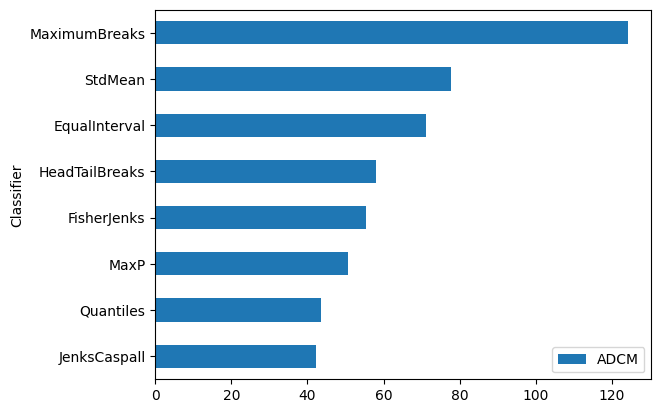

In [227]:
# Para comparar los datos se usa el ADCM
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [228]:
# Se crean los intervalos
theMapAndData['CO2_Qt_jc5'] = jc5.yb
theMapAndData[['CO2_Qt','CO2_Qt_jc5']].head()

,CO2_Qt,CO2_Qt_jc5
0,-1.392136,0
1,-0.286256,2
2,0.901777,3
3,0.284856,2
4,-0.725128,1


In [229]:
# Se añade los datos nuevos al mapa
indexList=['CO2_Qt_jc5']
aggregator={'CO2_Qt': ['mean']}
pd.concat([theMapAndData[['CO2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,CO2_Qt_jc5,CO2_Qt
,,mean
0,0,-1.608993
1,1,-0.626060
2,2,-0.008105
3,3,0.625737
4,4,1.626888


In [230]:
# Cambio de nombre a los intervalos, para obtener un mapa mas detallado
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndData['CO2_Qt_jc5_cat']=theMapAndData.loc[:,'CO2_Qt_jc5'].replace(newLabelsForLevels)
# Ahora se tiene dos columnas una con los intervalos con nombre y la otra con los intervalos sin nombre
theMapAndData[['CO2_Qt','CO2_Qt_jc5','CO2_Qt_jc5_cat']].head(20)

,CO2_Qt,CO2_Qt_jc5,CO2_Qt_jc5_cat
0,-1.392136,0,0_Great
1,-0.286256,2,2_Middle
2,0.901777,3,3_Bad
3,0.284856,2,2_Middle
4,-0.725128,1,1_Good
5,-0.493152,1,1_Good
6,0.130552,2,2_Middle
7,-1.728745,0,0_Great
8,0.948860,3,3_Bad
9,1.415035,4,4_Poor


Por ultimo se crea el mapa que ya esta unido a la vriable CO2 y discretizado

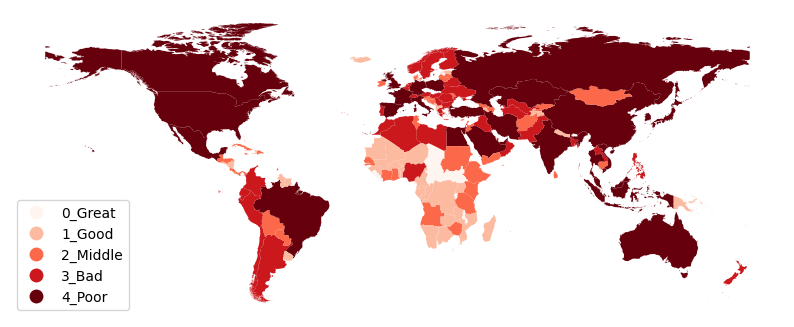

In [231]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='CO2_Qt_jc5_cat',
                   cmap='Reds',
                   categorical=True,
                   edgecolor='grey',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

**FOREST**

In [232]:
import mapclassify
import numpy as np

np.random.seed(12345)

# Se utiliza 5 intervalos y se compara los diferentes metodos
K=5
theVar=theMapAndData.ForestRev_gdp_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

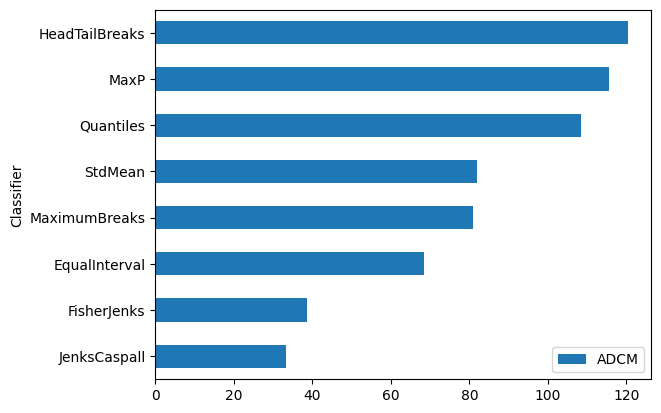

In [233]:
# Para comparar los datos se usa el ADCM
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [234]:
# Se crean los intervalos
theMapAndData['Forest_Qt_jc5'] = jc5.yb
theMapAndData[['ForestRev_gdp_Qt','Forest_Qt_jc5']].head()

,ForestRev_gdp_Qt,Forest_Qt_jc5
0,-5.199338,0
1,-0.076809,2
2,-0.338888,1
3,-0.791639,1
4,-0.102491,2


In [235]:
# Se añade los datos nuevos al mapa
indexList=['Forest_Qt_jc5'] # add more?
aggregator={'ForestRev_gdp_Qt': ['mean']}
pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Forest_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-5.199338
1,1,-0.686007
2,2,0.015000
3,3,0.656443
4,4,1.654991


In [236]:
# Cambio de nombre a los intervalos, para obtener un mapa mas detallado
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndData['Forest_Qt_jc5_cat']=theMapAndData.loc[:,'Forest_Qt_jc5'].replace(newLabelsForLevels)
# Ahora se tiene dos columnas una con los intervalos con nombre y la otra con los intervalos sin nombre
theMapAndData[['ForestRev_gdp_Qt','Forest_Qt_jc5','Forest_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,Forest_Qt_jc5,Forest_Qt_jc5_cat
0,-5.199338,0,0_Great
1,-0.076809,2,2_Middle
2,-0.338888,1,1_Good
3,-0.791639,1,1_Good
4,-0.102491,2,2_Middle
5,0.080756,2,2_Middle
6,0.195412,2,2_Middle
7,0.052982,2,2_Middle
8,-0.393598,1,1_Good
9,-0.245431,2,2_Middle


Por ultimo se crea el mapa que ya esta unido a la variable Forest y discretizado

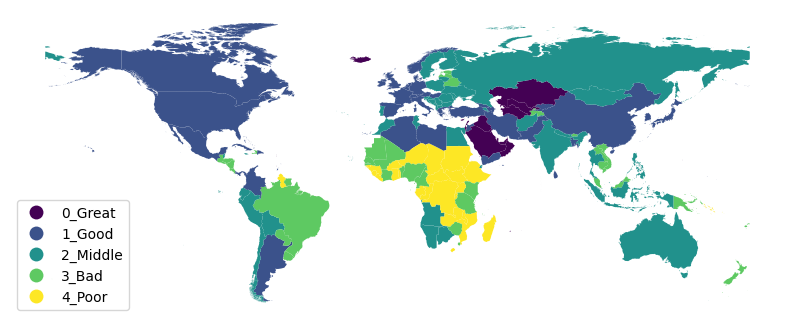

In [237]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Forest_Qt_jc5_cat',
                   cmap='viridis',
                   categorical=True,
                   edgecolor='white',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [304]:
# Se muestra que la data si esta unida
theMapAndData

,COUNTRY,geometry,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp,CO2_Qt,ForestRev_gdp_Qt,CO2_Qt_jc5,CO2_Qt_jc5_cat,Forest_Qt_jc5,Forest_Qt_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00,-1.392136,-5.199338,0,0_Great,0,0_Great
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20,-0.286256,-0.076809,2,2_Middle,2,2_Middle
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10,0.901777,-0.338888,3,3_Bad,1,1_Good
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",The Republic of Azerbaijan,.az,AZ,AZE,73.2,35389000.0,MIDDLE EAST,0.02,0.284856,-0.791639,2,2_Middle,1,1_Good
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18,-0.725128,-0.102491,1,1_Good,2,2_Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",The Republic of Zambia,.zm,ZM,ZMB,85.7,6798000.0,AFRICA,4.45,-0.451080,1.381193,1,1_Good,4,4_Poor
166,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",The Republic of Zimbabwe,.zw,ZW,ZWE,99.5,7902000.0,AFRICA,1.61,-0.280057,0.762094,2,2_Middle,3,3_Bad
167,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...",The Republic of South Sudan,.ss,SS,SSD,112.2,1778000.0,AFRICA,2.65,-1.021024,1.068273,0,0_Great,4,4_Poor
168,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",The Republic of Indonesia,.id,ID,IDN,70.4,563543000.0,EAST AND SOUTHEAST ASIA,0.39,1.592560,0.238779,4,4_Poor,2,2_Middle


In [239]:
# se guarda los datos
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

## Se añade una nueva variables y se realiza los mismos pasos

LECTURA DE DATOS

In [305]:
birth_rate=pd.read_csv('https://github.com/Tracy-12/introgeodf/raw/refs/heads/main/birth_rate.csv')

In [306]:
import pandas as pd
birth_rate.rename(columns={'value':'birth_rate','name':'Country'},inplace=True)
birth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              227 non-null    object 
 1   slug                 227 non-null    object 
 2   birth_rate           227 non-null    float64
 3   date_of_information  227 non-null    object 
 4   ranking              227 non-null    int64  
 5   region               227 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.8+ KB


In [307]:
theMapAndData['COUNTRY']=theMapAndData.COUNTRY.str.upper()
birth_rate['Country']=birth_rate.Country.str.upper()

In [309]:
#Se saca los paises unico en el mapa y en la nueva variable
onlyBirthRate=set(birth_rate.Country)- set(theMapAndData.COUNTRY)
onlyMap1=set(theMapAndData.COUNTRY)- set(birth_rate.Country)

In [310]:
onlyMap1

{'AMERICAN SAMOA (US)',
 'BAHAMAS',
 'CAPE VERDE',
 'CONGO',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'EAST TIMOR',
 'FEDERATED STATES OF MICRONESIA',
 'GAMBIA',
 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (US)'}

FUZZY MERGING

In [245]:
#!pip install thefuzz

In [311]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyBirthRate)]

[('AMERICAN SAMOA', ('AMERICAN SAMOA (US)', 95)),
 ('ANDORRA', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('ANGUILLA', ('NORTHERN MARIANA ISLANDS (US)', 56)),
 ('ARUBA', ('GAMBIA', 55)),
 ('BAHAMAS, THE', ('BAHAMAS', 90)),
 ('BERMUDA', ('NORTHERN MARIANA ISLANDS (US)', 51)),
 ('BRITISH VIRGIN ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 60)),
 ('BURMA', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CAYMAN ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO, REPUBLIC OF THE', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('COOK ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CURACAO', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('CZECHIA', ('MACEDONIA', 50)),
 ('DOMINICA', ('MACEDONIA', 59)),
 ('ERITREA', ('FEDERATED STATES OF MICRONESIA', 51)),
 ('FALKLAND ISLANDS (ISLAS MALVINAS)', ('NORTHERN MARIANA ISLANDS (US)', 

In [313]:
#Se busca los paises con mejores conincidencias
[(Country, process.extractOne(Country,onlyMap1)) for Country in sorted(onlyBirthRate)
 if process.extractOne(Country,onlyMap1)[1]>=90]

[('AMERICAN SAMOA', ('AMERICAN SAMOA (US)', 95)),
 ('BAHAMAS, THE', ('BAHAMAS', 90)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO, REPUBLIC OF THE', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('GAMBIA, THE', ('GAMBIA', 90)),
 ('MICRONESIA, FEDERATED STATES OF', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('NORTHERN MARIANA ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 95)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

In [314]:
#se guarda los datos
try1={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyBirthRate)
 if process.extractOne(country,onlyMap1)[1]>=90}
try1

{'AMERICAN SAMOA': 'AMERICAN SAMOA (US)',
 'BAHAMAS, THE': 'BAHAMAS',
 'CONGO, DEMOCRATIC REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO, REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'GAMBIA, THE': 'GAMBIA',
 'MICRONESIA, FEDERATED STATES OF': 'FEDERATED STATES OF MICRONESIA',
 'NORTHERN MARIANA ISLANDS': 'NORTHERN MARIANA ISLANDS (US)',
 'SAMOA': 'AMERICAN SAMOA (US)'}

In [315]:
birth_rate.replace(to_replace={'Country':try1},inplace=True)

#actualizacion
onlyBirthRate=set(birth_rate.Country)- set(theMapAndData.COUNTRY)
onlyMap1=set(theMapAndData.COUNTRY)- set(birth_rate.Country)
#nuevas conincidencias
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyBirthRate)]

[('ANDORRA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('ANGUILLA', ('MACEDONIA', 47)),
 ('ARUBA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 54)),
 ('BERMUDA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 39)),
 ('BRITISH VIRGIN ISLANDS', ('EAST TIMOR', 43)),
 ('BURMA', ('MACEDONIA', 51)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CAYMAN ISLANDS', ('MACEDONIA', 50)),
 ('COOK ISLANDS', ('CONGO', 68)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CURACAO', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('CZECHIA', ('MACEDONIA', 50)),
 ('DOMINICA', ('MACEDONIA', 59)),
 ('ERITREA', ('KOREA (THE REPUBLIC OF)', 45)),
 ('FALKLAND ISLANDS (ISLAS MALVINAS)', ('MACEDONIA', 42)),
 ('FAROE ISLANDS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 42)),
 ('FRENCH POLYNESIA', ('MACEDONIA', 42)),
 ('GAZA STRIP', ('KOREA (THE REPUBLIC OF)', 45)),
 ('GIBRALTAR', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 40)),
 ('GREENLAND', ('KOREA (THE REPUBLIC OF)', 39)),
 ('GUAM', ('MACEDONIA', 36)),
 ('GUERNSEY'

In [316]:
#Se busca los paises con mejores conincidencias
[(Country, process.extractOne(Country,onlyMap1)) for Country in sorted(onlyBirthRate)
 if process.extractOne(Country,onlyMap1)[1]>=80]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('ISLE OF MAN', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOREA, NORTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOREA, SOUTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [317]:
try2={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyBirthRate)
 if process.extractOne(country,onlyMap1)[1]in([80,81])}
try2

{'CABO VERDE': 'CAPE VERDE', 'TIMOR-LESTE': 'EAST TIMOR'}

In [318]:
birth_rate.replace(to_replace={'Country':try2},inplace=True)

#actualizacion
onlyBirthRate=set(birth_rate.Country)- set(theMapAndData.COUNTRY)
onlyMap1=set(theMapAndData.COUNTRY)- set(birth_rate.Country)
#nuevas conincidencias
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyBirthRate)]

[('ANDORRA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('ANGUILLA', ('MACEDONIA', 47)),
 ('ARUBA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 54)),
 ('BERMUDA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 39)),
 ('BRITISH VIRGIN ISLANDS', ('IVORY COAST', 39)),
 ('BURMA', ('MACEDONIA', 51)),
 ('CAYMAN ISLANDS', ('MACEDONIA', 50)),
 ('COOK ISLANDS', ('CONGO', 68)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CURACAO', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('CZECHIA', ('MACEDONIA', 50)),
 ('DOMINICA', ('MACEDONIA', 59)),
 ('ERITREA', ('KOREA (THE REPUBLIC OF)', 45)),
 ('FALKLAND ISLANDS (ISLAS MALVINAS)', ('MACEDONIA', 42)),
 ('FAROE ISLANDS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 42)),
 ('FRENCH POLYNESIA', ('MACEDONIA', 42)),
 ('GAZA STRIP', ('KOREA (THE REPUBLIC OF)', 45)),
 ('GIBRALTAR', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 40)),
 ('GREENLAND', ('KOREA (THE REPUBLIC OF)', 39)),
 ('GUAM', ('MACEDONIA', 36)),
 ('GUERNSEY', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC

In [319]:
onlyMap1

{'CONGO',
 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MACEDONIA'}

In [323]:
birth_rate[birth_rate.Country.str.contains('CON|KORE|LAO|MACE|IVORY|COAST')]

,Country,slug,birth_rate,date_of_information,ranking,region
6,DEMOCRATIC REPUBLIC OF THE CONGO,congo-democratic-republic-of-the,40.53,2021 est.,7,Africa
25,DEMOCRATIC REPUBLIC OF THE CONGO,congo-republic-of-the,32.15,2021 est.,26,Africa
56,LAOS,laos,22.74,2021 est.,57,East Asia/Southeast Asia
124,"KOREA, NORTH",korea-north,14.35,2021 est.,125,East Asia/Southeast Asia
224,"KOREA, SOUTH",korea-south,6.89,2021 est.,226,East Asia/Southeast Asia


In [325]:
manualChanges={'DEMOCRATIC REPUBLIC OF THE CONGO':'CONGO','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

onlyBirthRate=set(birth_rate.Country)- set(theMapAndData.COUNTRY)
onlyMap1=set(theMapAndData.COUNTRY)- set(birth_rate.Country)
#nuevas conincidencias
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyBirthRate)]

[('ANDORRA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('ANGUILLA', ('MACEDONIA', 47)),
 ('ARUBA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 54)),
 ('BERMUDA', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 39)),
 ('BRITISH VIRGIN ISLANDS', ('IVORY COAST', 39)),
 ('BURMA', ('MACEDONIA', 51)),
 ('CAYMAN ISLANDS', ('MACEDONIA', 50)),
 ('COOK ISLANDS', ('CONGO', 68)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CURACAO', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('CZECHIA', ('MACEDONIA', 50)),
 ('DOMINICA', ('MACEDONIA', 59)),
 ('ERITREA', ('KOREA (THE REPUBLIC OF)', 45)),
 ('FALKLAND ISLANDS (ISLAS MALVINAS)', ('MACEDONIA', 42)),
 ('FAROE ISLANDS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 42)),
 ('FRENCH POLYNESIA', ('MACEDONIA', 42)),
 ('GAZA STRIP', ('KOREA (THE REPUBLIC OF)', 45)),
 ('GIBRALTAR', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 40)),
 ('GREENLAND', ('KOREA (THE REPUBLIC OF)', 39)),
 ('GUAM', ('MACEDONIA', 36)),
 ('GUERNSEY', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC

In [326]:
# Se une la data del mapa y la nueva variable
theMapAndData1=theMapAndData.merge(birth_rate,left_on='COUNTRY', right_on='Country')
# Eliminar columna duplicada de country
theMapAndData1.drop(columns=['Country'],inplace=True) # no need for this column
# Nuevo mapa
theMapAndData1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COUNTRY              167 non-null    object  
 1   geometry             167 non-null    geometry
 2   Officialstatename    167 non-null    object  
 3   InternetccTLD        167 non-null    object  
 4   iso2                 166 non-null    object  
 5   iso3                 167 non-null    object  
 6   fragility            167 non-null    float64 
 7   co2                  167 non-null    float64 
 8   region_x             167 non-null    object  
 9   ForestRev_gdp        167 non-null    float64 
 10  CO2_Qt               167 non-null    float64 
 11  ForestRev_gdp_Qt     167 non-null    float64 
 12  CO2_Qt_jc5           167 non-null    int64   
 13  CO2_Qt_jc5_cat       167 non-null    object  
 14  Forest_Qt_jc5        167 non-null    int64   
 15  Forest_Qt_jc5_c

RE SCALING

In [327]:
DataNames=['birth_rate','co2', 'ForestRev_gdp']

In [328]:
pd.melt(theMapAndData1[DataNames])

,variable,value
0,birth_rate,15.30
1,birth_rate,36.08
2,birth_rate,19.24
3,birth_rate,14.03
4,birth_rate,12.86
...,...,...
496,ForestRev_gdp,4.45
497,ForestRev_gdp,1.61
498,ForestRev_gdp,2.65
499,ForestRev_gdp,0.39


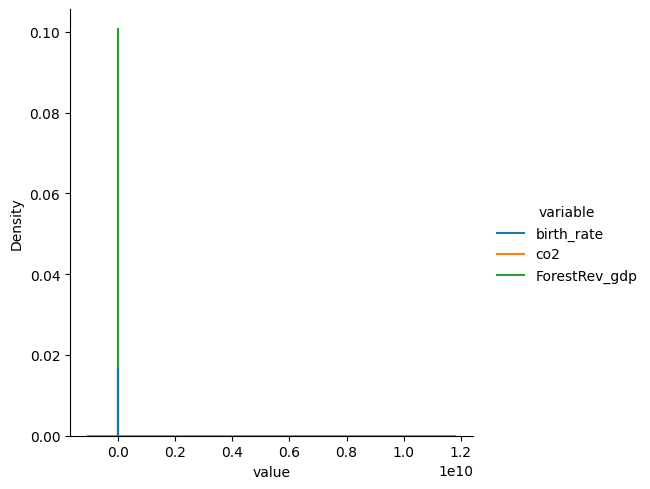

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData1[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [331]:
#!pip install -U scikit-learn

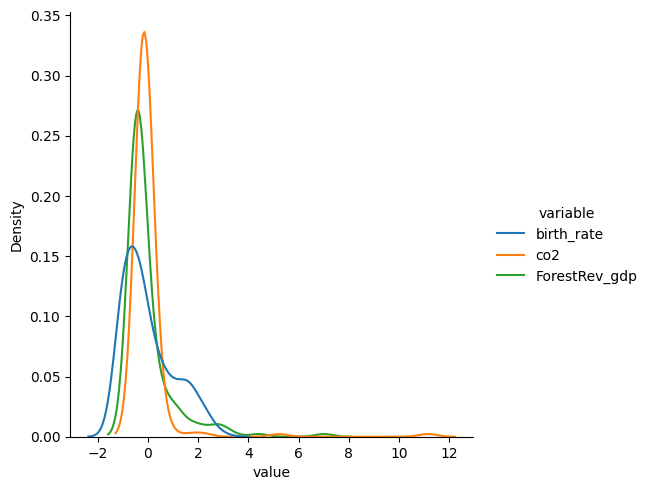

In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData1[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

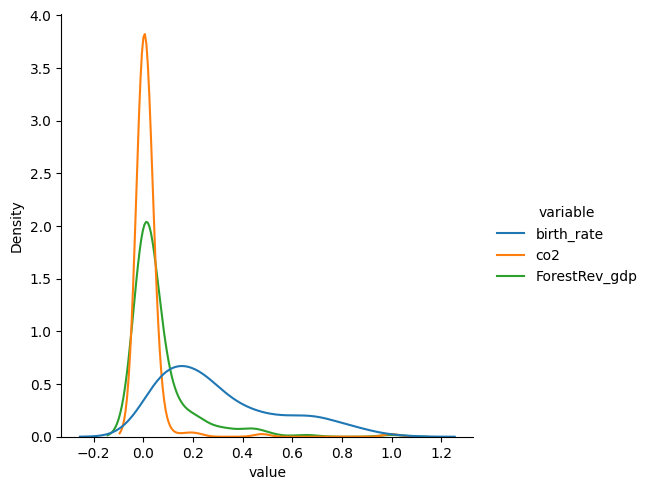

In [333]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData1[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

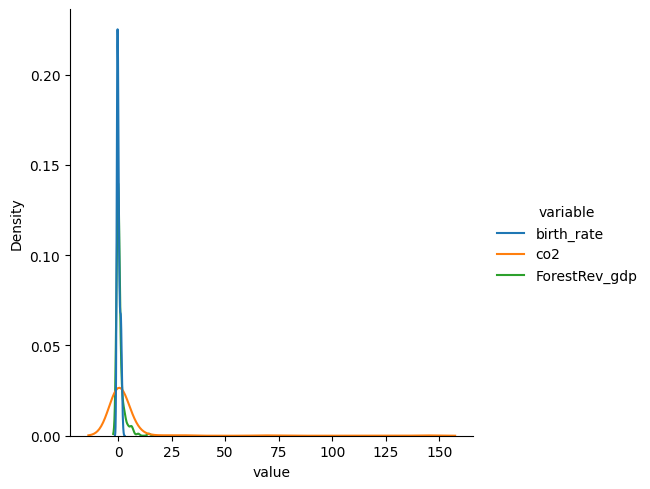

In [334]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData1[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

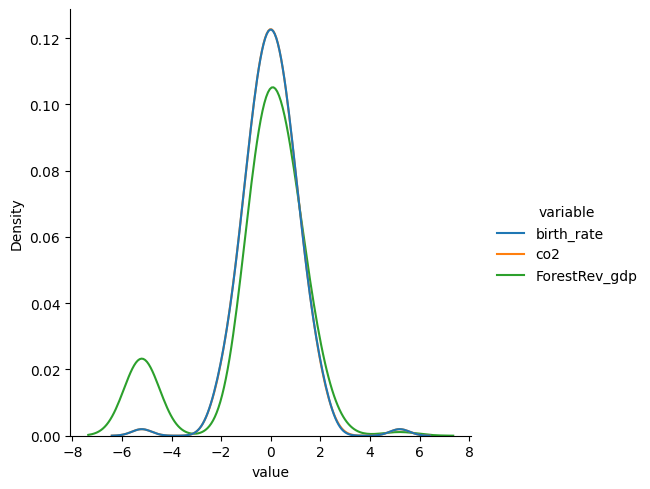

In [335]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData1[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [336]:
theMapAndData1['birth_rate_Qt'] = QtScaled_data[:, 0]

Discretizacion

In [340]:
#! pip show numba mapclassify numpy

In [342]:
#!pip install mapclassify

In [348]:
import mapclassify
import numpy as np

np.random.seed(12345)

# Se utiliza 5 intervalos y se compara los diferentes metodos
K=5
theVar=theMapAndData1.birth_rate_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

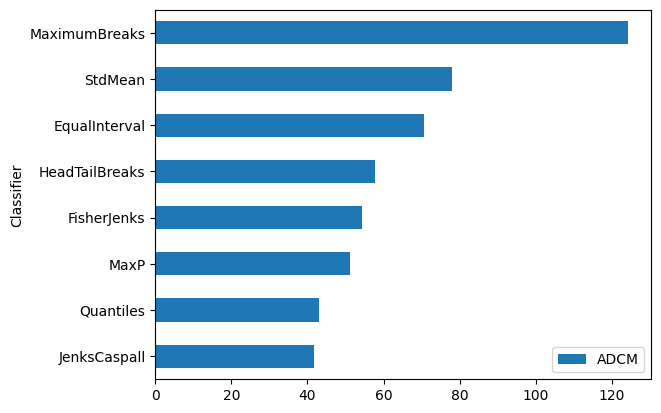

In [349]:
# Para comparar los datos se usa el ADCM
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [345]:
# Se crean los intervalos
theMapAndData1['birth_rate_Qt_jc5'] = jc5.yb
theMapAndData1[['birth_rate','birth_rate_Qt_jc5']].head()

,birth_rate,birth_rate_Qt_jc5
0,15.30,2
1,36.08,4
2,19.24,3
3,14.03,1
4,12.86,1


In [350]:
# Se añade los datos nuevos al mapa
indexList=['birth_rate_Qt_jc5']
aggregator={'birth_rate_Qt': ['mean']}
pd.concat([theMapAndData1[['birth_rate_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,birth_rate_Qt_jc5,birth_rate_Qt
,,mean
0,0,-1.700065
1,1,-0.643460
2,2,0.015576
3,3,0.651767
4,4,1.665145


In [351]:
# Cambio de nombre a los intervalos, para obtener un mapa mas detallado
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndData1['birth_rate_Qt_jc5_cat']=theMapAndData1.loc[:,'birth_rate_Qt_jc5'].replace(newLabelsForLevels)
# Ahora se tiene dos columnas una con los intervalos con nombre y la otra con los intervalos sin nombre
theMapAndData1[['birth_rate_Qt','birth_rate_Qt_jc5','birth_rate_Qt_jc5_cat']].head(20)

,birth_rate_Qt,birth_rate_Qt_jc5,birth_rate_Qt_jc5_cat
0,-0.206659,2,2_Middle
1,1.483219,4,4_Poor
2,0.332532,3,3_Bad
3,-0.364540,1,1_Good
4,-0.453773,1,1_Good
5,-0.707651,1,1_Good
6,2.349295,4,4_Poor
7,0.337878,3,3_Bad
8,0.108623,2,2_Middle
9,-0.139423,2,2_Middle


Por ultimo se crea el mapa que ya esta unido a la variable Birth rate  y discretizado

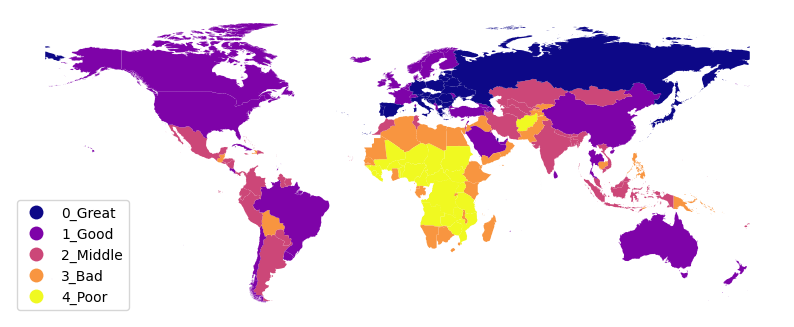

In [352]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData1.plot(column='birth_rate_Qt_jc5_cat',
                   cmap='plasma',
                   categorical=True,
                   edgecolor='grey',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [353]:
#Se añade la nueva capa al mapa
theMapAndData1.to_file(os.path.join("maps","worldMaps.gpkg"), layer='birth_rate_indicators', driver="GPKG")